<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h1 style="color: green;"><b>👋Welcome, Let's Start</b></h1>
    <hr style = "height: 2px; color: black;">

In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
# from imblearn.ensemble import BalancedRandomForestClassifier
# from catboost import CatBoostClassifier
# from lightgbm import LGBMClassifier
# from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gren = Style.BRIGHT + Fore.GREEN
blk = Style.BRIGHT + Fore.BLACK
res = Style.RESET_ALL

In [2]:
df = pd.read_csv('/Users/trannhutquang/Documents/Python/Data Visualization/data/Passanger_booking_data.csv')

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [4]:
print(f'{blk}Total number of null values in data {df.isna().sum().sum()}')
print(f'Total number of Duplicate rows in data {df.duplicated().sum()}')

Total number of null values in data 0
Total number of Duplicate rows in data 719


In [5]:
df.drop_duplicates(inplace = True)

In [6]:
print(f'{blk}The shape of the data {df.shape}')

The shape of the data (49283, 14)


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h1 style="color: green;"><b>📈Exploratory Data Analysis</b></h1>
    <hr style = "height: 2px; color: black;">

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000
mean,1.590204,84.723393,23.054197,9.070613,0.668222,0.295639,0.426638,7.279937,0.149991
std,1.016540,90.409389,33.831644,5.413007,0.470856,0.456334,0.494594,1.496381,0.357066
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49283 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49283 non-null  int64  
 1   sales_channel          49283 non-null  object 
 2   trip_type              49283 non-null  object 
 3   purchase_lead          49283 non-null  int64  
 4   length_of_stay         49283 non-null  int64  
 5   flight_hour            49283 non-null  int64  
 6   flight_day             49283 non-null  object 
 7   route                  49283 non-null  object 
 8   booking_origin         49283 non-null  object 
 9   wants_extra_baggage    49283 non-null  int64  
 10  wants_preferred_seat   49283 non-null  int64  
 11  wants_in_flight_meals  49283 non-null  int64  
 12  flight_duration        49283 non-null  float64
 13  booking_complete       49283 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ 

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h1 style="color: green;"><b>💡About the DataSet</b></h1>
    <hr style = "height: 2px; color: black;">
  <ul>
    <li><b>Data Size</b>: The dataset contains 49283 rows and 14 columns.</li>
    <li><b>Data Types</b>: The data contains features with data types int64, Object, Binary and float64.</li>
    <li><b>Missing Values</b>: No column has missing values in the dataset, which is a great sign and simplifies the data cleaning process.</li>
    <li><b>Unique Values</b>: The number of unique values varies among features.</li>
    <li><b>Statistical Details</b>: The 'min', 'max', 'average', and 'standard deviation' values indicate the range and dispersion of data for each column, highlighting potential outliers or anomalies.</li>
    <li><b>Irrelevant Features</b>: All the Features seems important and useful for final evaluation.</li>
</ul>

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}
sns.set(rc = rc)

palette_color = sns.color_palette('dark')
palette1 = ['dimgrey','crimson']
palette2 = ['crimson', 'dimgrey']
palette3 = ['darkgreen', 'orange']
palette4 = ['salmon','mediumseagreen']
palette5 = ['mediumseagreen','salmon']

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h3 style="color: #DEB887;"><b>Booking complete</b></h3>

<Axes: ylabel='booking_complete'>

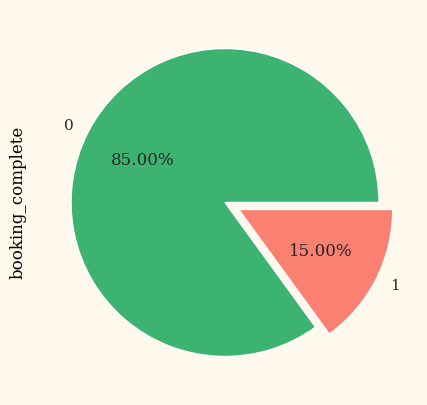

In [10]:
plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
df['booking_complete'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', colors = palette5, 
                                     explode = [0, 0.1])

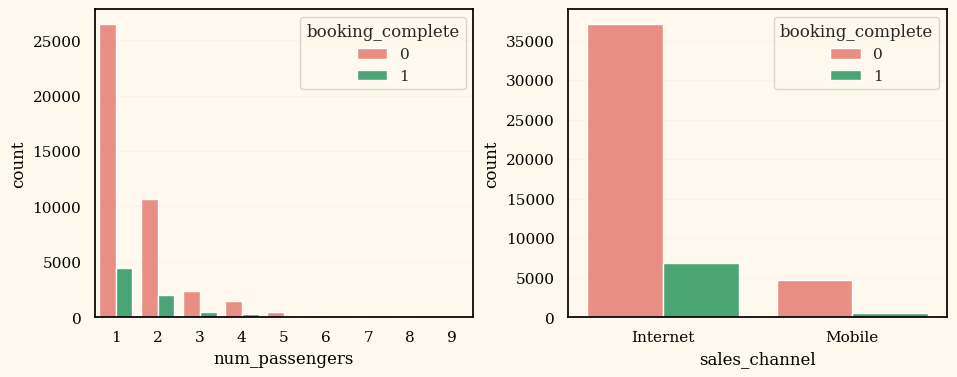

In [11]:
plt.figure(figsize = (11,4))
plt.subplot(121)
sns.countplot(data = df, x = 'num_passengers', hue = 'booking_complete', palette = palette4)
plt.subplot(122)
sns.countplot(data = df, x = 'sales_channel', palette = palette4, hue = 'booking_complete')
plt.subplots_adjust(wspace=0.25)

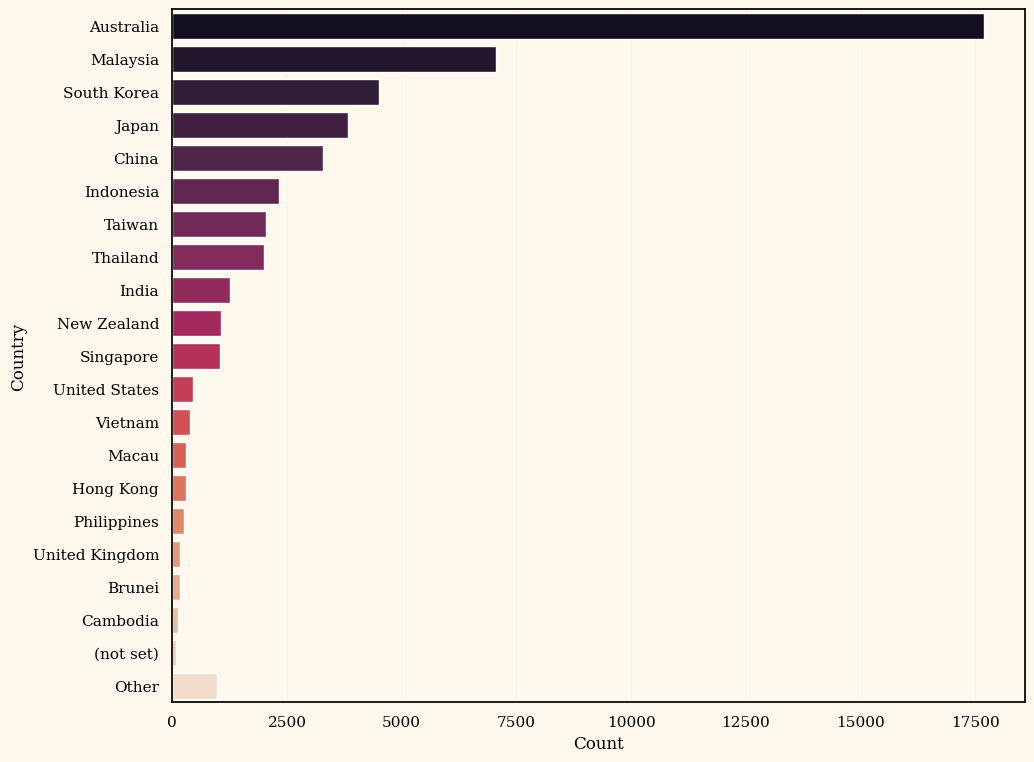

In [12]:
plt.figure(figsize = (11,9))
country_counts = df.booking_origin.value_counts()
top_origin = country_counts.head(20)
other_count = country_counts.iloc[20:].sum()

temp = pd.DataFrame({
    'Country': top_origin.index,
    'Count': top_origin.values
})
other_data = pd.DataFrame({
    'Country': ['Other'],
    'Count': [other_count]
})
temp = pd.concat([temp, other_data], axis = 0)

sns.barplot(x='Count', y='Country', data=temp, palette = 'rocket')
# plt.xticks(rotation = 90)
del temp

<Axes: xlabel='flight_day', ylabel='count'>

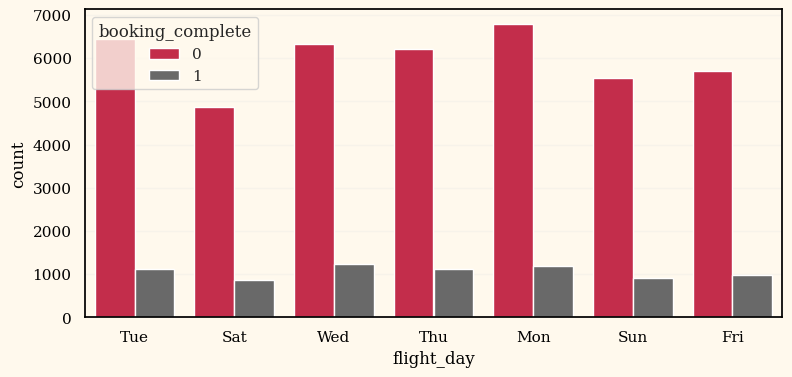

In [13]:
plt.figure(figsize = (9,4))
sns.countplot(data = df, x ='flight_day', hue = 'booking_complete', palette = palette2)

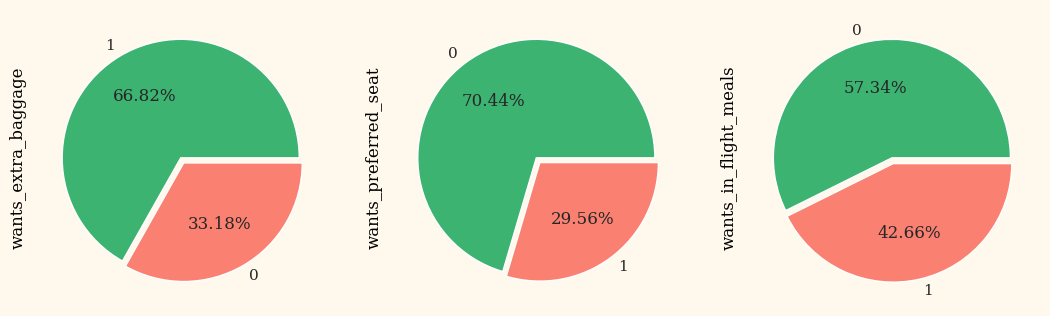

In [14]:
plt.figure(figsize = (13, 7))
binary_cols = ['wants_extra_baggage', 'wants_preferred_seat','wants_in_flight_meals']
for i, col in enumerate(binary_cols):
    plt.subplot(1,3,i+1)
    df[col].value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = [0, 0.05], colors = palette5)

<Axes: ylabel='purchase_lead'>

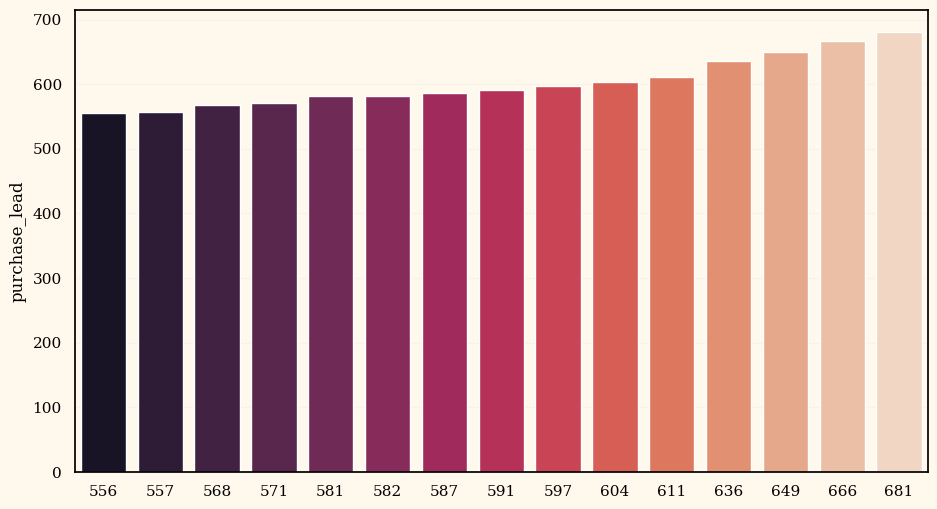

In [15]:
plt.figure(figsize = (11,6))
temp = df.purchase_lead.value_counts().head(15)
sns.barplot(data = temp, x = temp.values, y = temp.index, palette = 'rocket')

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h1 style="color: green;"><b>📦Processing</b></h1>
    <hr style = "height: 2px; color: black;">

In [9]:
df = pd.get_dummies(df, columns = ['sales_channel','trip_type','flight_day','booking_origin'], drop_first = True)

In [10]:
df.drop(['purchase_lead','route'], axis = 1, inplace = True)

In [11]:
num_cols = ['num_passengers', 'length_of_stay', 'flight_hour', 'flight_duration']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [19]:
df.describe()

,num_passengers,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
count,4.928300e+04,4.928300e+04,4.928300e+04,49283.000000,49283.000000,49283.000000,4.928300e+04,49283.000000,49283.000000,49283.000000,...,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000
mean,1.499431e-17,-4.267611e-17,-2.624004e-17,0.668222,0.295639,0.426638,1.077283e-15,0.149991,0.108861,0.007832,...,0.000041,0.000020,0.000041,0.000183,0.000101,0.000852,0.003510,0.009192,0.000020,0.007832
std,1.000010e+00,1.000010e+00,1.000010e+00,0.470856,0.456334,0.494594,1.000010e+00,0.357066,0.311468,0.088154,...,0.006370,0.004505,0.006370,0.013513,0.010072,0.029181,0.059145,0.095433,0.004505,0.088154
min,-5.806062e-01,-6.814458e-01,-1.675724e+00,0.000000,0.000000,0.000000,-1.744184e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.806062e-01,-5.336537e-01,-7.520134e-01,0.000000,0.000000,0.000000,-1.109312e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-5.806062e-01,-1.789525e-01,-1.304512e-02,1.000000,0.000000,0.000000,1.938452e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.031327e-01,1.461901e-01,7.259232e-01,1.000000,1.000000,1.000000,1.035886e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.289305e+00,2.231501e+01,2.573344e+00,1.000000,1.000000,1.000000,1.483637e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h2 style="color : green"><b>💡Insights of EDA</b></h2>
    <hr style = "height: 2px; color: black;">
    <ul>
        <li> Their are lot of features, we have to being selective and creative due to correlation of features and we can also create some new and more useful features</li>
        <li>Majority of customers wants extra baggage, improving this area could result in better experience for customers.</li>
        <li>Scaling is required</li>
        <li>High percentage of the customers haven't completed the booking which is not a good sign for the Airline.</li>
        <li>Features like booking_origin have high number of catgory variables, they need a proper treatment.</li>
    </ul>
    </div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h1 style="color: green;"><b>🤖Model Training</b></h1>
    <hr style = "height: 2px; color: black;">

In [12]:
X = df.drop('booking_complete', axis = 1)
y = df['booking_complete']

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size =0.2, random_state = 42)

In [15]:
def train_classifier(model, x_train, y_train, x_val, y_val, name = "model"):
    print(f'{blk} For {name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    score = accuracy_score(y_val, y_pred)
    if score<0.85:
        print(f'{red}')
    else:
        print(f'{gren}')
    print(f'{confusion_matrix(y_pred, y_val)}')
    print(f'Accuracy is {score}')
    print(f'{blk}')
    print('='*80)

In [16]:
models = {
    'LogisticRegression':LogisticRegression(),
    'RFC':RandomForestClassifier(),
    'Hist-Gradient':HistGradientBoostingClassifier()
}

In [17]:
for i in range(len(models)):
    model = list(models.values())[i]
    name = list(models.keys())[i]
    train_classifier(model, X_train, y_train, X_val, y_val, name = name)

 For LogisticRegression

[[8472 1512]
 [   8    9]]
Accuracy is 0.8480151984801519

 For RFC

[[8151 1304]
 [ 329  217]]
Accuracy is 0.8367163283671633

 For Hist-Gradient

[[8459 1490]
 [  21   31]]
Accuracy is 0.8489151084891511

